# Artificial Neural Network

### Importing the libraries

In [1]:
!pip install autoviz

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import io
import pandas as pd
import pandas_profiling
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.68. Call using: 
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'


In [3]:
tf.__version__

'2.3.0'

In [4]:
from google.colab import files
uploaded = files.upload()


Saving Churn_Modelling.csv to Churn_Modelling.csv


In [5]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')

# Exploratory Data Analysis

In [6]:
!pip install sweetviz

In [7]:
import sweetviz as sv
sweet_report = sv.analyze(dataset)

:FEATURES DONE:                    |█████████████████████| [100%]   00:05  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [8]:
#display the report
sweet_report.show_html('sweet_report.html')

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [9]:
#importing Autoviz class
from autoviz.AutoViz_Class import AutoViz_Class
#Instantiate the AutoViz class
AV = AutoViz_Class()

Shape of your Data Set: (10000, 14)
Classifying variables in data set...
    14 Predictors classified...
        This does not include the Target column(s)
    3 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 3
Time to run AutoViz (in seconds) = 3.922


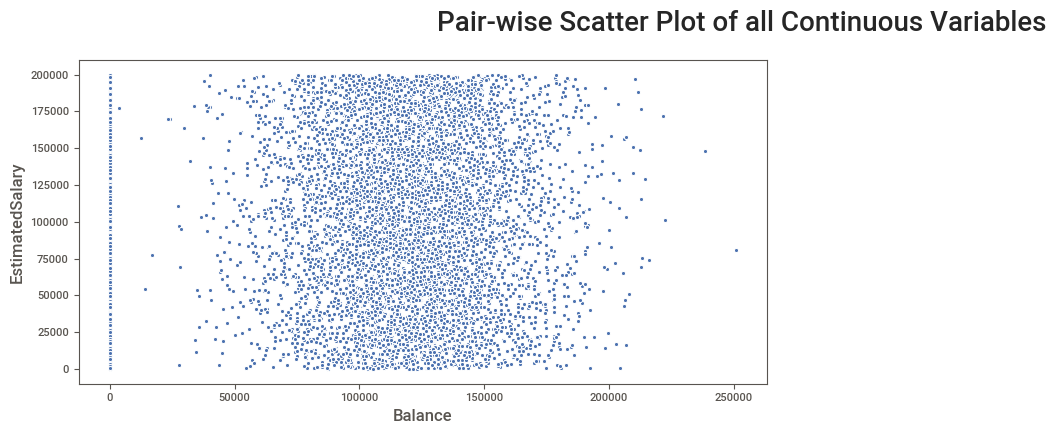

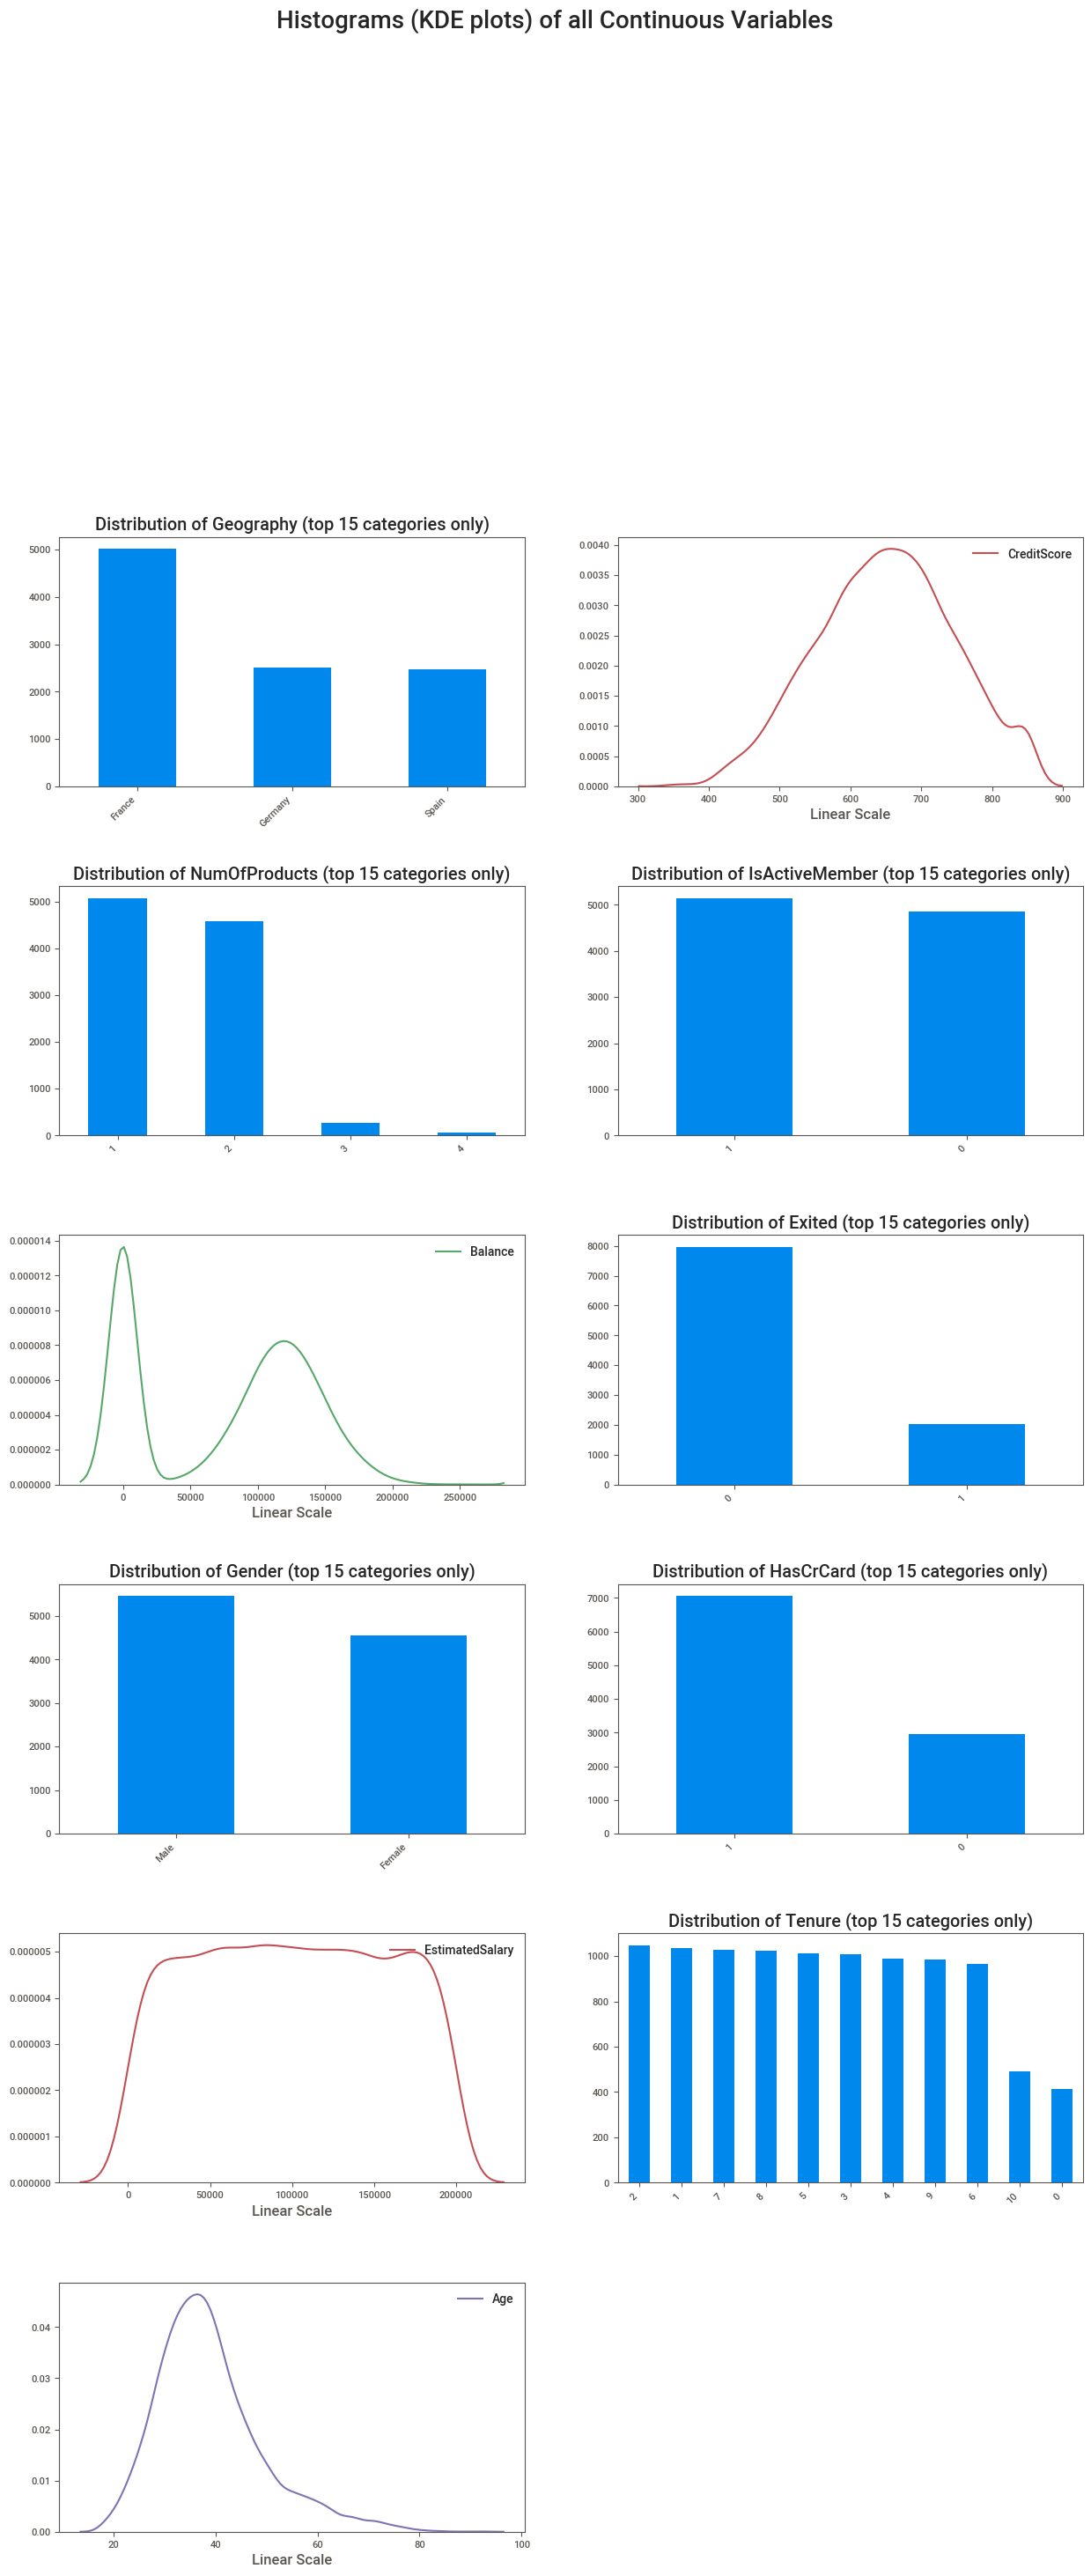

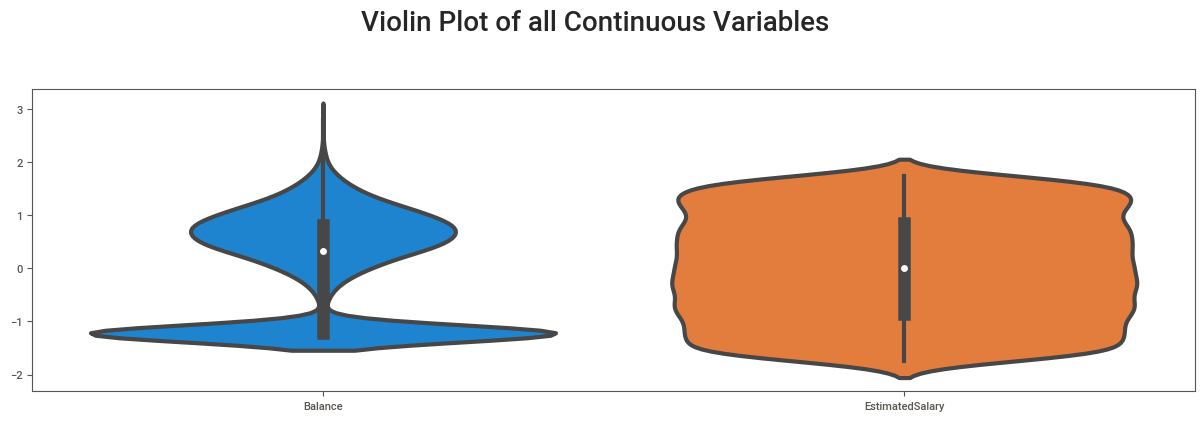

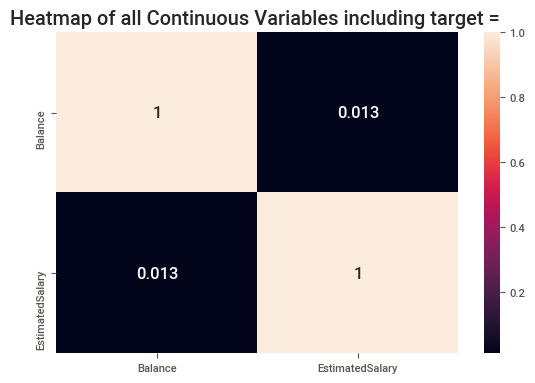

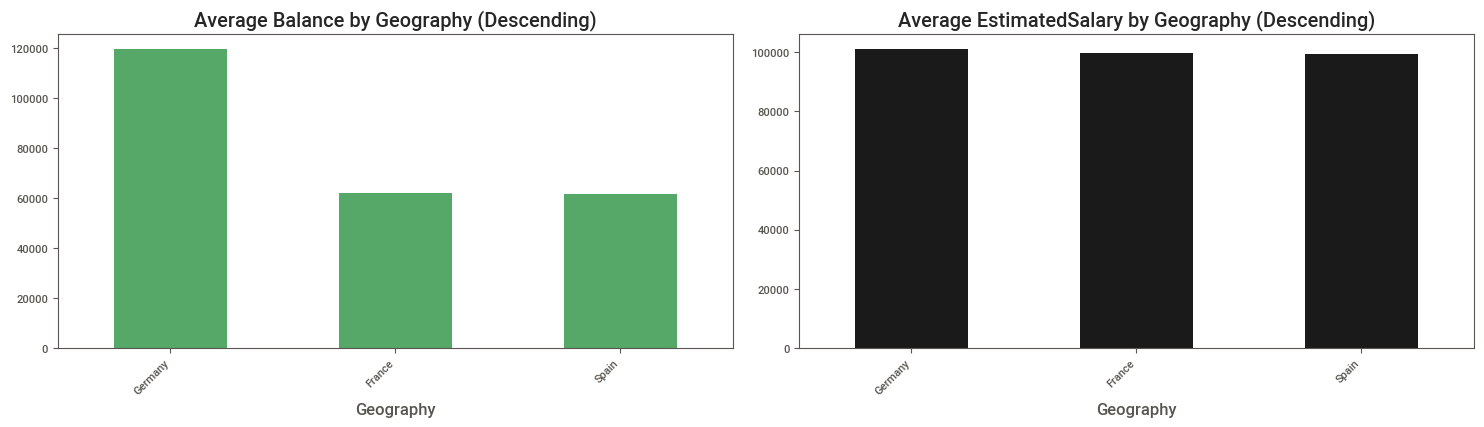

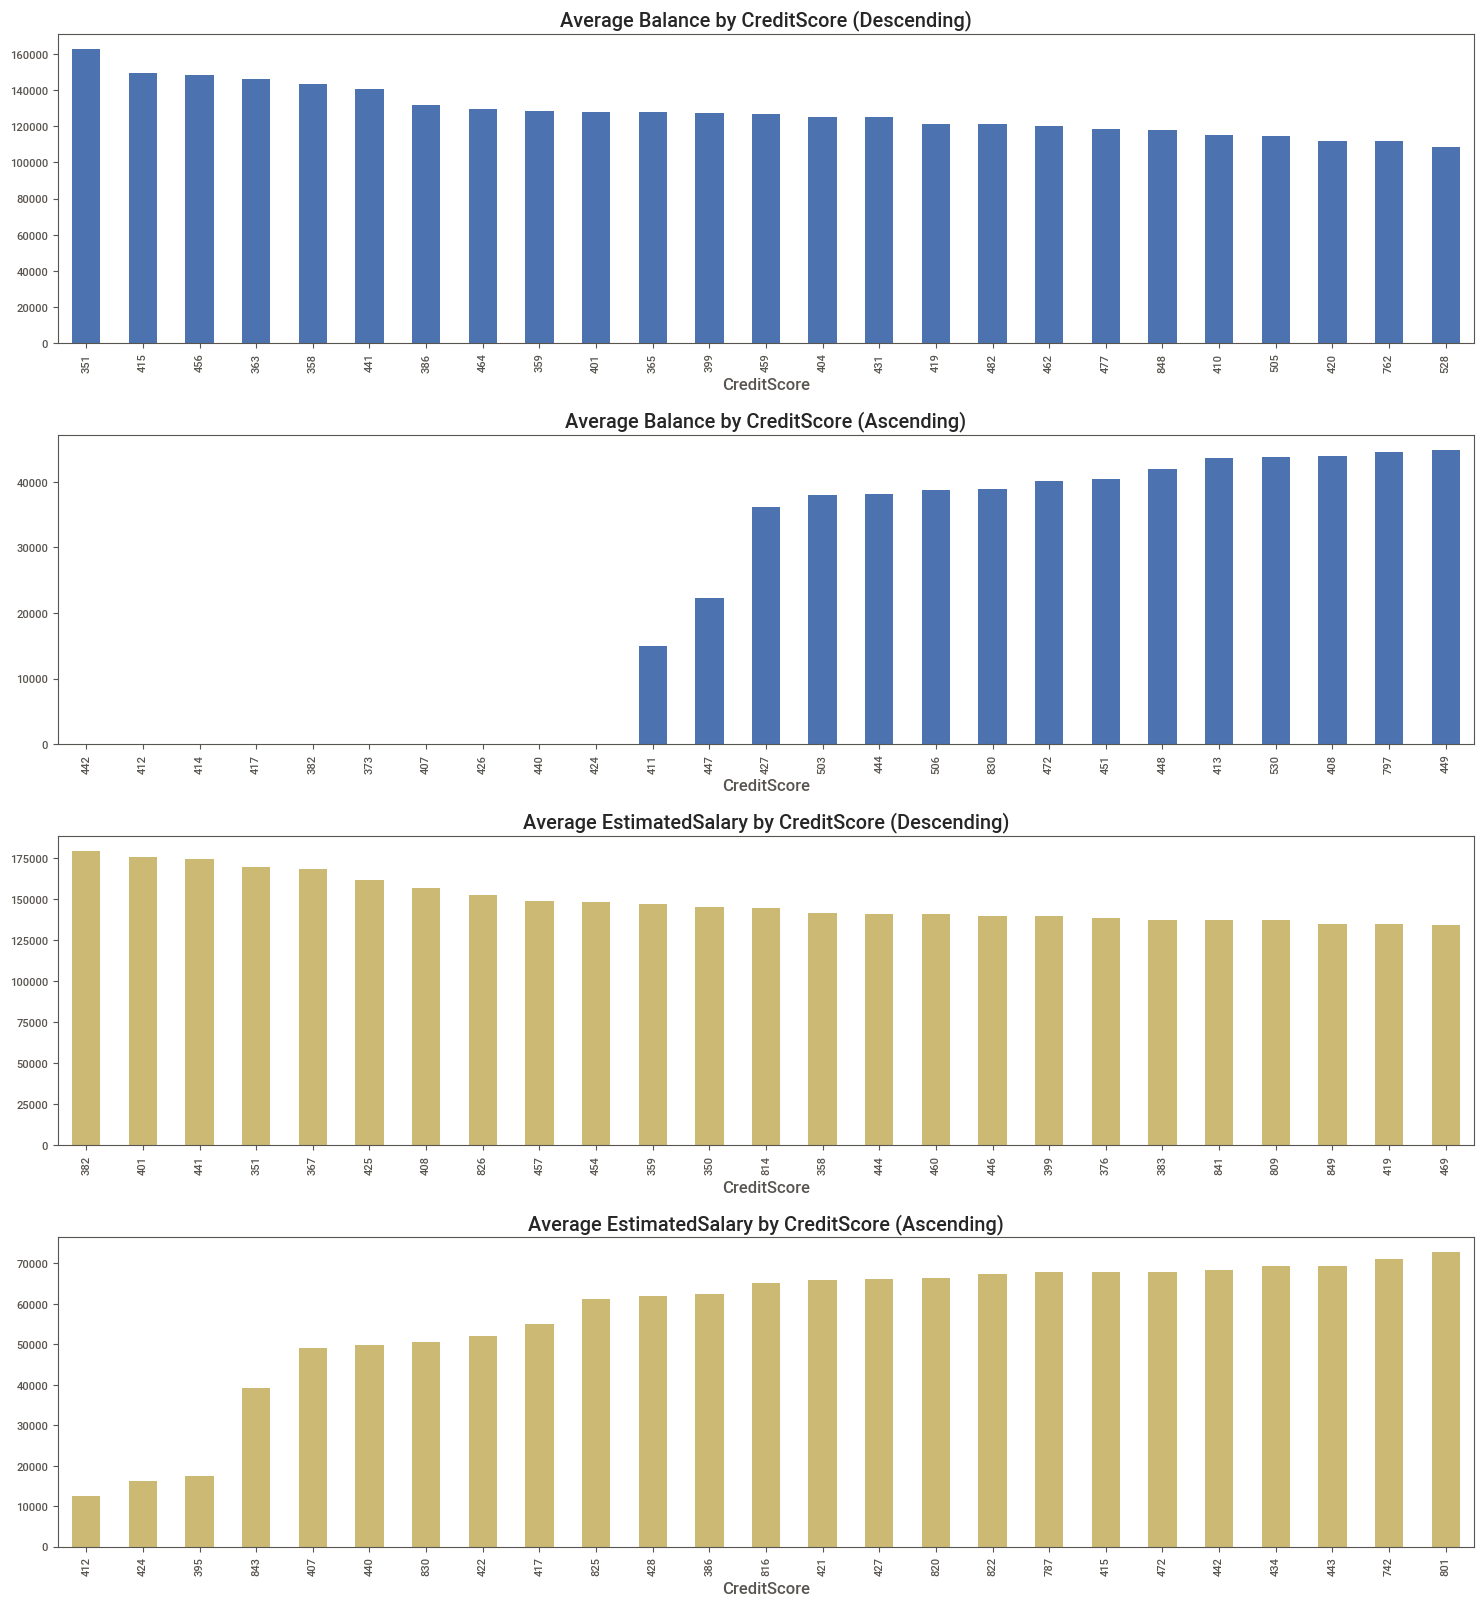

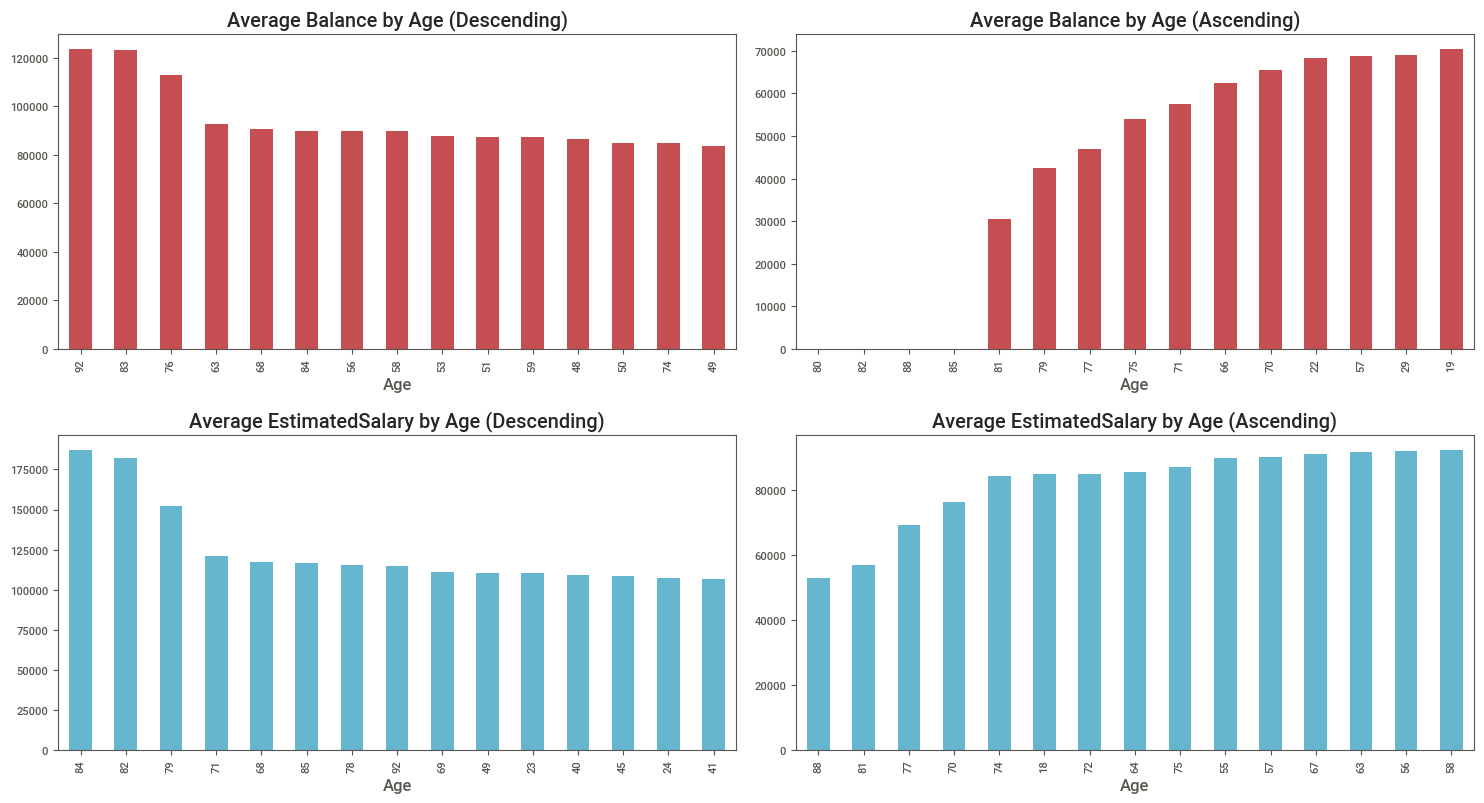

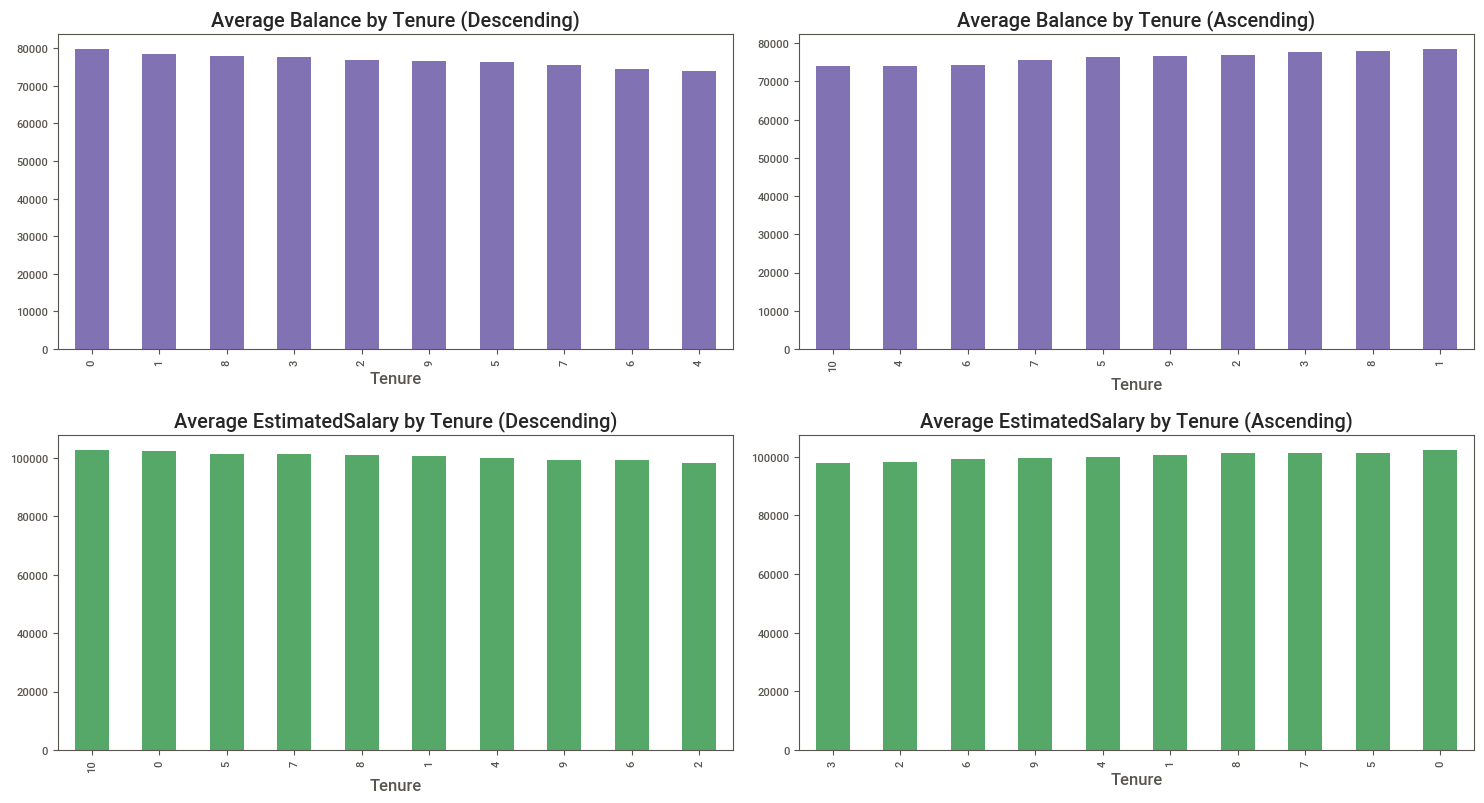

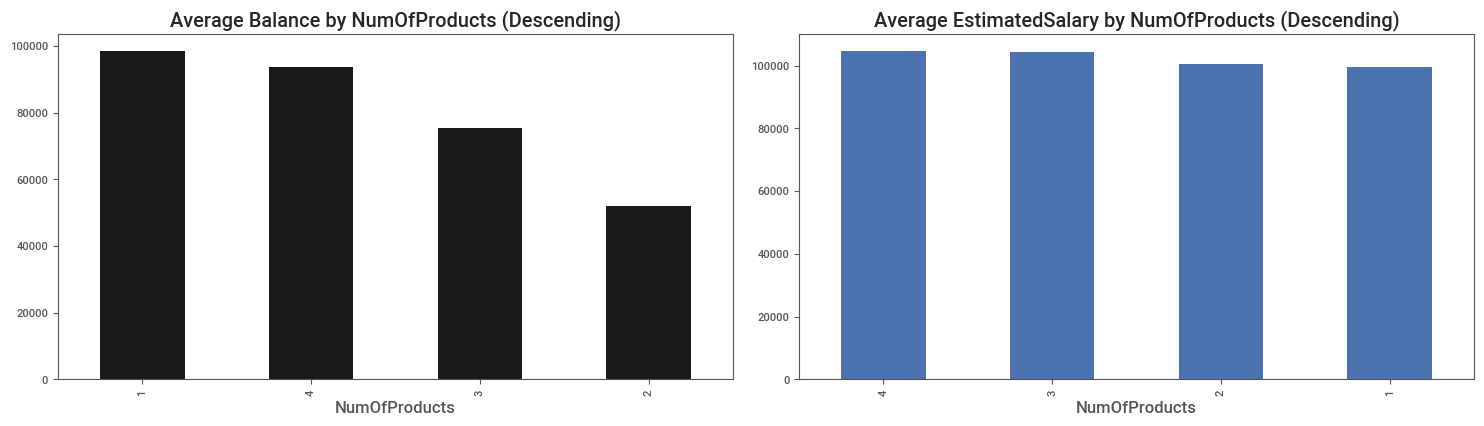

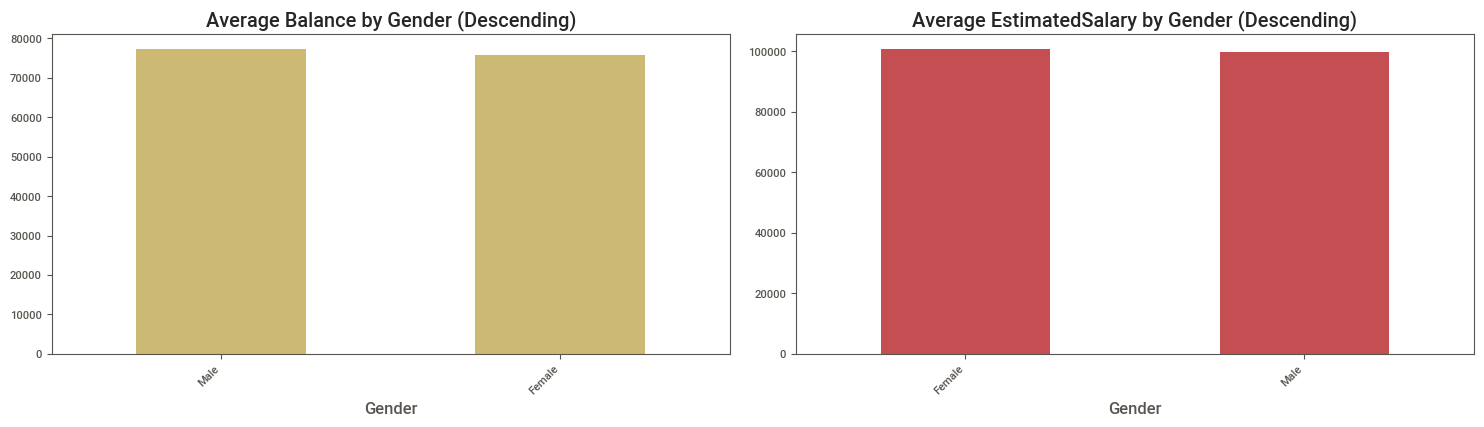

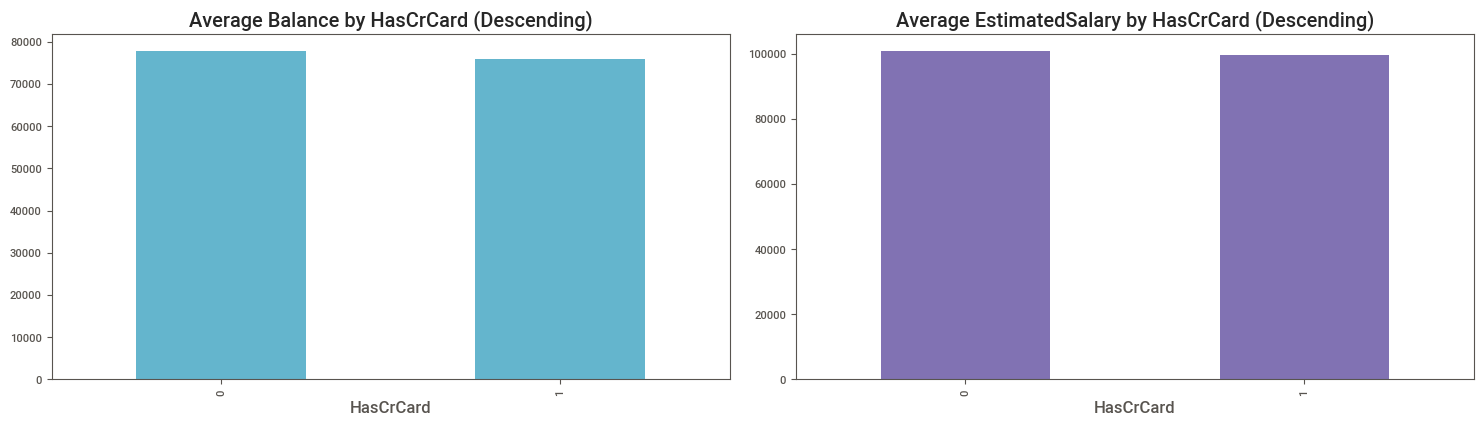

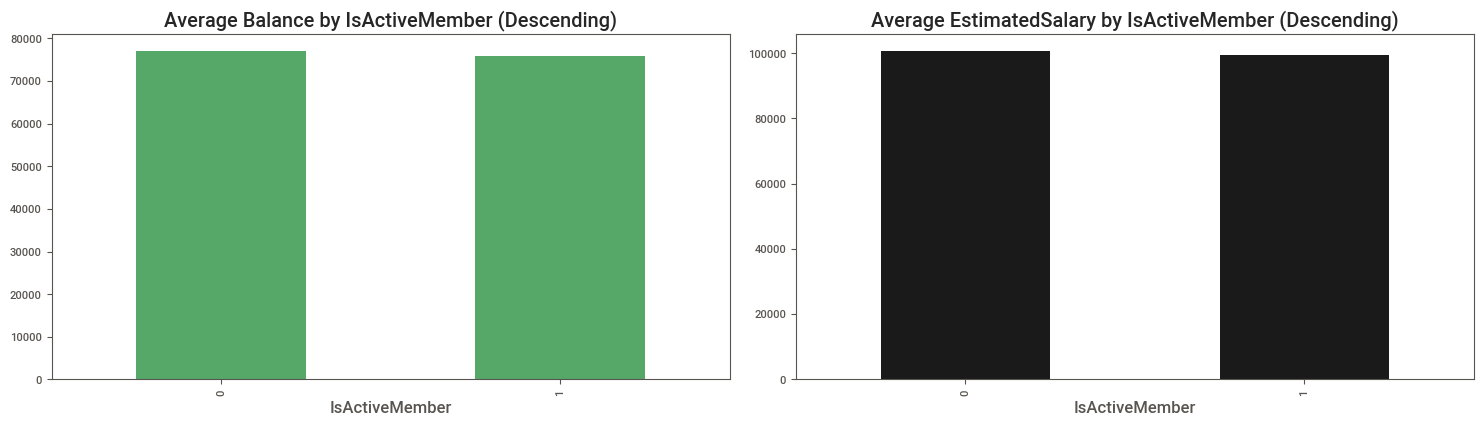

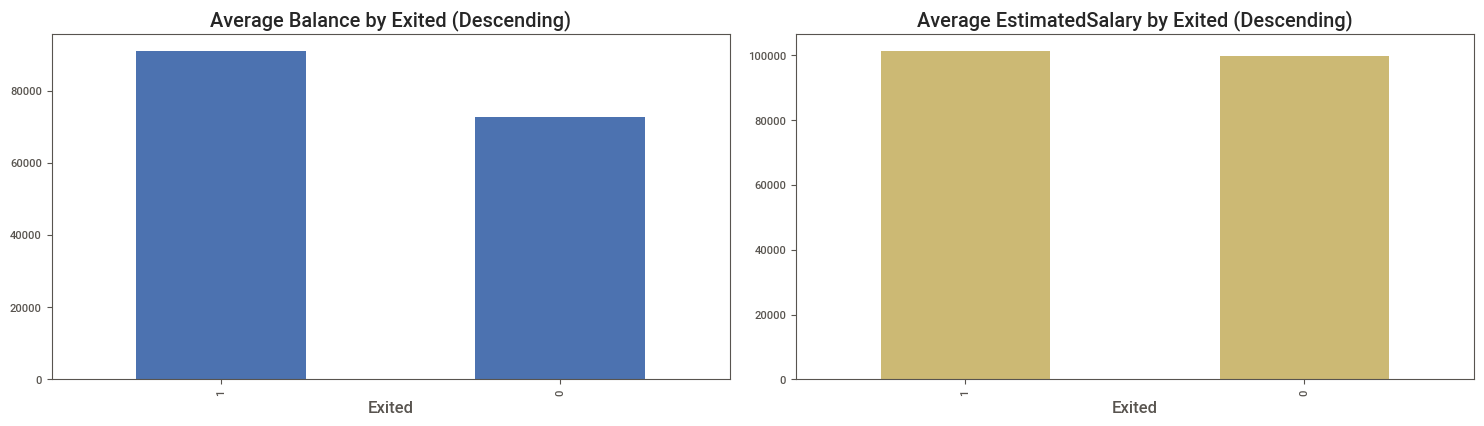

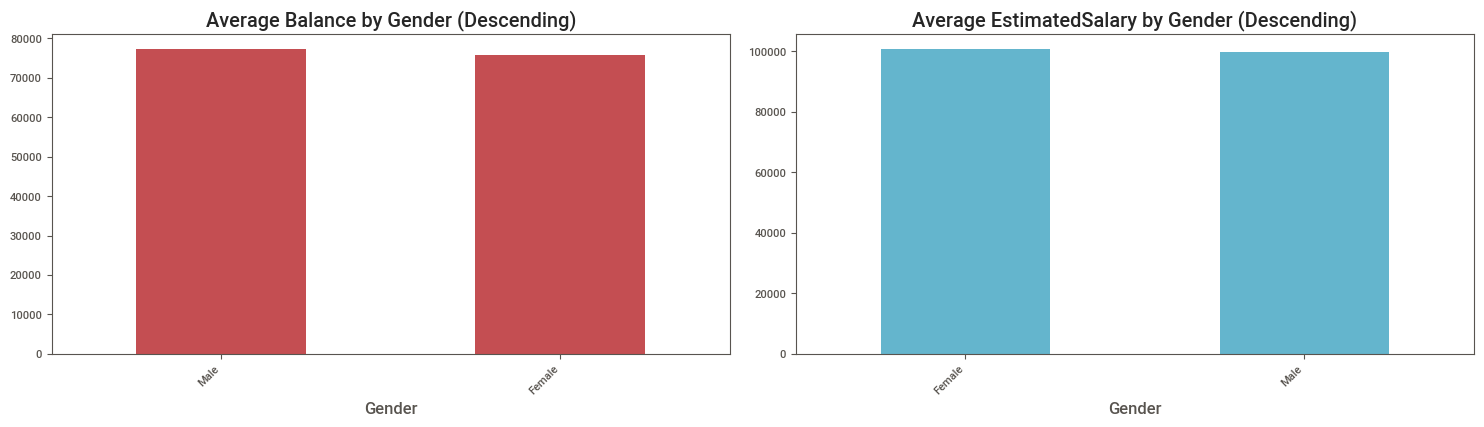

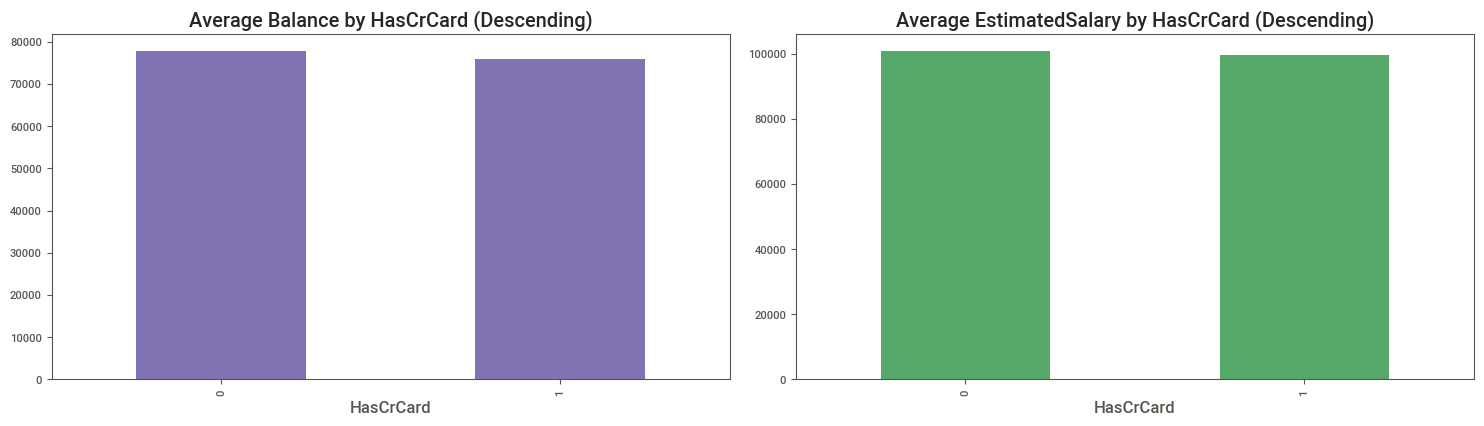

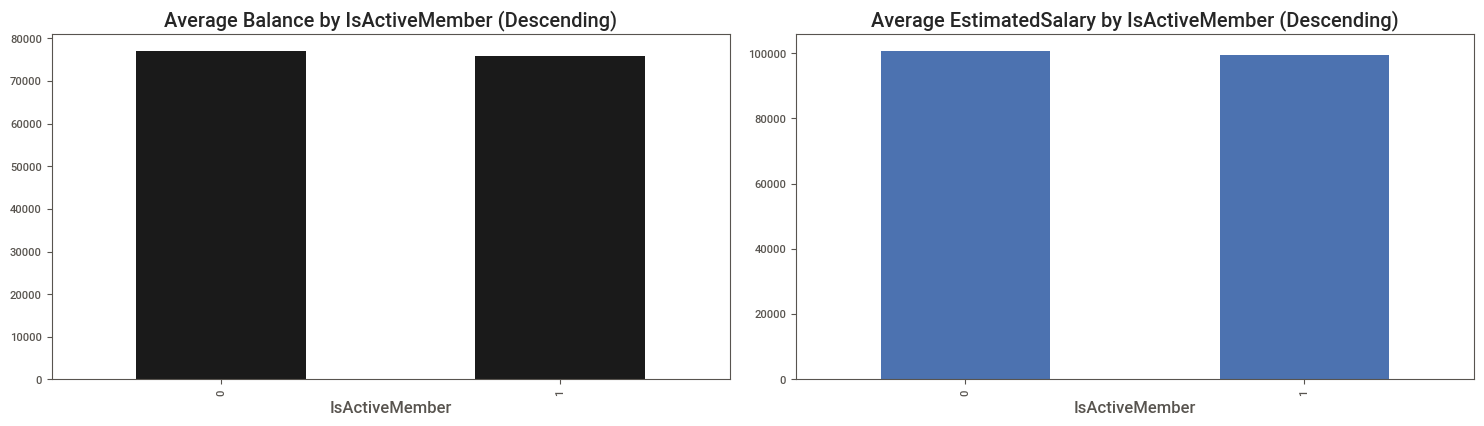

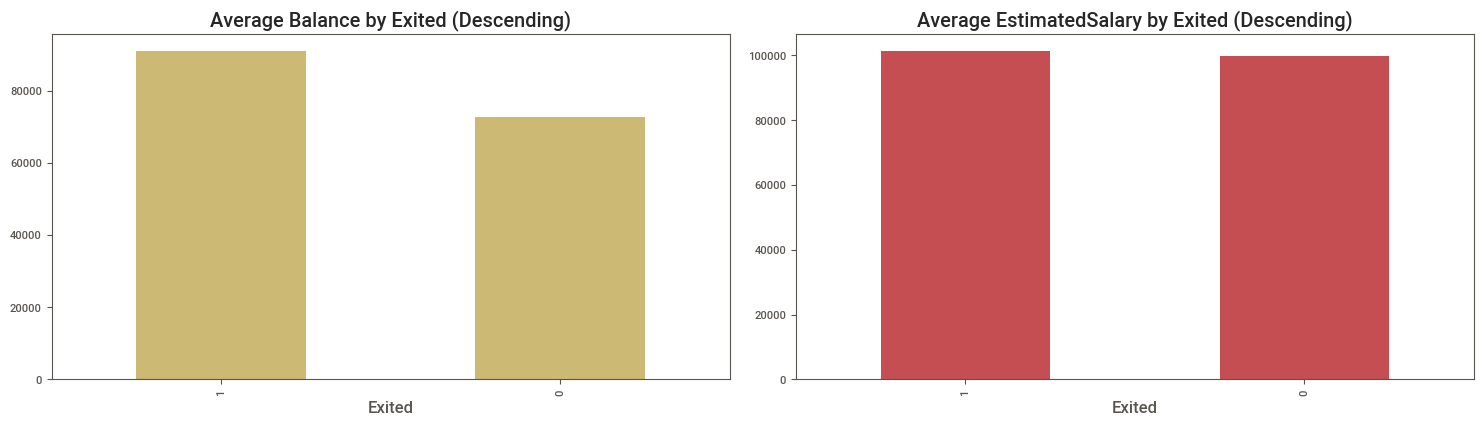

In [10]:
df = AV.AutoViz('/content/Churn_Modelling.csv')


In [11]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Part 1 - Data Preprocessing

In [12]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [13]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [14]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [16]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [18]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [21]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [22]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu')) # Dense to add fully connected layer
#Units means to the number of neurons we want ( independant variable)

### Adding the second hidden layer

In [23]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [24]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [25]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [26]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)
#batch_size is the number of predictions we want to have in our batch to compare to our actual value

Epoch 1/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5518 - accuracy: 0.7620
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4700 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4480 - accuracy: 0.7962
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4375 - accuracy: 0.7994
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4309 - accuracy: 0.8083
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4266 - accuracy: 0.8104
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4223 - accuracy: 0.8089
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4167 - accuracy: 0.8140
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4073 - accuracy: 0.8210
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3936 - accura

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

**Solution**

In [27]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))

[[0.03200775]]


In [28]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

[[False]]


Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [29]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1514   81]
 [ 196  209]]


0.8615